# Shallow Neural Network

This is a test notebook for the ShallowNet class. Here we use a shallow neural network to classify images containing cats.

In [1]:
import h5py
import numpy as np
from shallownet import ShallowNet
import matplotlib.pyplot as plt

In [2]:
def load_dataset():
    train = h5py.File('data/train_cat.h5', 'r')
    x_train =  np.array(train['train_set_x'][:])
    y_train =  np.array(train['train_set_y'][:])

    test = h5py.File('data/test_cat.h5', 'r')
    x_test =  np.array(test['test_set_x'][:])
    y_test =  np.array(test['test_set_y'][:])
    
    classes = np.array(test["list_classes"][:])

    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))

    return x_train, y_train, x_test, y_test, classes

## Flatten Data

The images in the dataset are RGB images with 64x64 resolution. We use the following function to flatten the images.

In [3]:
def flattenData(x):
    return x.reshape(x.shape[0], -1).T

In [4]:
x_train, y_train, x_test, y_test, classes = load_dataset()

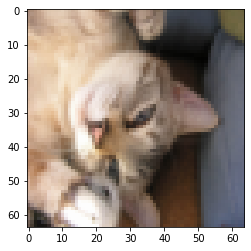

In [5]:
plt.imshow(x_train[110])

In [6]:
print(classes[np.squeeze(y_train[:, 110])].decode())

cat


In [7]:
# Normalizing the Values. 
X_train = flattenData(x_train) / 255.
X_test = flattenData(x_test) / 255.

In [8]:
# Create a ShallowNet instance and train
shallow = ShallowNet(hiddenLayerSize=60)
shallow.fit(X_train, y_train, learning_rate=0.05, verbose=True, iterations=10000, random_state=3)

Progress: ❚❚❚❚❚❚❚❚❚❚ cost=0.000334 ETA=0.03 secondsss


In [9]:
print(f'Accuracy: {shallow.evaluate(X_test, y_test)}%')

Accuracy: 78.0%


In [10]:
shallow.save_model('model.h5')

cat


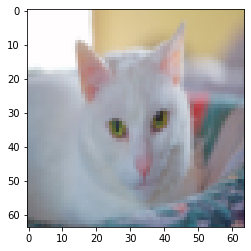

In [11]:
plt.imshow(x_test[2])
print(classes[np.squeeze(y_test[:, 2])].decode())

In [12]:
t = X_test[:, 2].reshape(X_test.shape[0], 1)
t.shape

(12288, 1)

In [13]:
p = shallow.predict(t)
print(np.squeeze(p)) # True -> Cat

True
